<a href="https://colab.research.google.com/github/EUtrilla2002/ProyectoDatos/blob/main/ProyectoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de datos

## Bases de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datos/contenido_zip/base_limpia_tipos.csv")  # Primera base de datos
print(df["categoria"].value_counts())

categoria
neutral     254295
negativo    254295
positivo    254295
Name: count, dtype: int64


In [4]:
df.head()

,review/score,review/text,categoria
0,3.0,I completely agree with some of the reviewers ...,neutral
1,2.0,When an RPG promises over 50 hours of gameplay...,negativo
2,3.0,This book started out meeting my expectations ...,neutral
3,5.0,I read this book for the 1st time last month. ...,positivo
4,3.0,Alice's adventures in wonderland. Alice was ge...,neutral


## Separación entre train y test de la base de datos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Split
X = df['review/text']
y = df['categoria']




## Limpieza de texto

In [10]:
print(df[df['categoria'] == 'positivo']['review/text'].head())  # Primeras 5 reseñas positivas
print(df[df['categoria'] == 'negativo']['review/text'].head())  # Primeras 5 reseñas negativas

3     I read this book for the 1st time last month. ...
5     Interesting and unusual novel. I particularly ...
7     We have lingered too long on the so-called, an...
8     I am a college student at St. John Fisher coll...
20    As any serious readers of romance novels knows...
Name: review/text, dtype: object
1     When an RPG promises over 50 hours of gameplay...
6     Romance purists should beware. This author see...
9     Not worth my time especially for a book club.....
10    Book was ok - it told you all that we know abo...
12    I wanted to like this book - I really did. A b...
Name: review/text, dtype: object


In [12]:
print(f"Reseñas positivas: {len(positivas)} caracteres")
print(f"Reseñas negativas: {len(negativas)} caracteres")


Reseñas positivas: 204815322 caracteres
Reseñas negativas: 214216397 caracteres


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


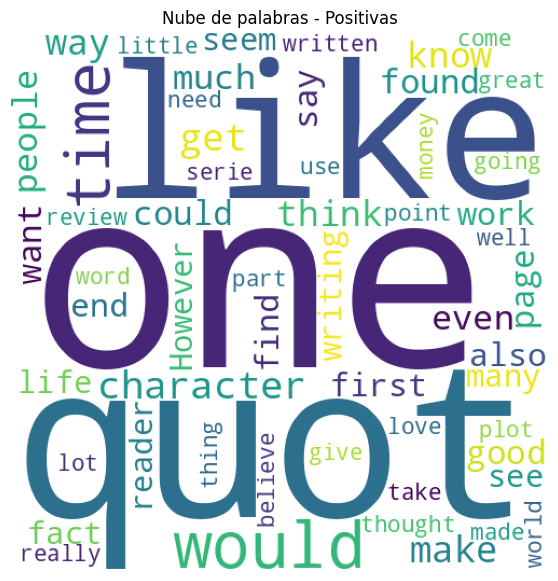

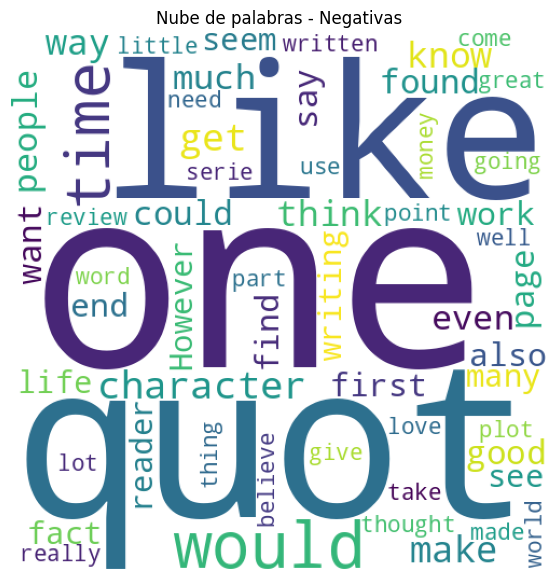

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Asegúrate de tener descargadas las stopwords de nltk
nltk.download('stopwords')

# Lista de stopwords personalizadas
stopwords_adicionales = {'book', 'read', 'novel', 'story', 'books', 'reading', 'author', 'chapter', 'reader', 'reading', 'writting', 'one', 'quot'}

# Obtener las stopwords comunes en inglés de NLTK
stopwords_comunes = set(stopwords.words('english'))

# Combinar ambas listas de stopwords
stopwords_totales = stopwords_adicionales.union(stopwords_comunes)

# Asumimos que 'categoria' es la columna con las categorías (Positivo, Negativo, Neutral)
# Filtramos las reseñas positivas
positivas = df[df['categoria'] == 'positivo']['review/text'].str.cat(sep=" ")

# Filtramos las reseñas negativas
negativas = df[df['categoria'] == 'negativo']['review/text'].str.cat(sep=" ")

# Configuramos la nube de palabras, incluyendo las stopwords combinadas
wc = WordCloud(
    width=500,
    height=500,
    min_font_size=15,
    background_color='white',
    stopwords=stopwords_totales  # Añadimos las stopwords combinadas
)

# Nube de palabras para las reseñas positivas
positivas_wc = wc.generate(positivas)

# Nube de palabras para las reseñas negativas
negativas_wc = wc.generate(negativas)

# Mostramos la nube de palabras positiva
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.title('Nube de palabras - Positivas')
plt.imshow(positivas_wc)
plt.show()

# Mostramos la nube de palabras negativa
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.title('Nube de palabras - Negativas')
plt.imshow(negativas_wc)
plt.show()




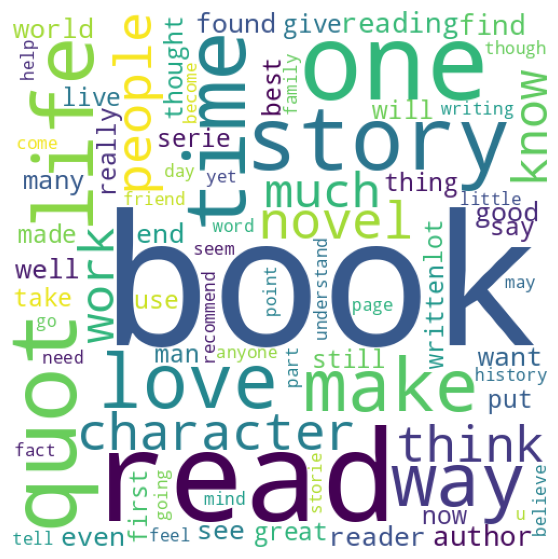

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(df[df['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

In [26]:
import re
import html

stopwords_adicionales = {'book', 'read', 'novel', 'story', 'books', 'reading', 'author', 'chapter'}

def limpiar_texto(texto):
    texto = html.unescape(texto)  # convierte &quot; en "
    return texto.strip()

# Aplica la función a cada elemento de la Serie X
X = X.apply(limpiar_texto)
y = y.apply(limpiar_texto)



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Tokenización y análisis de palabras

In [28]:
# 2. Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')  # stop_words='english' elimina las stopwords en inglés
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
